In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import os

import add_features

from statsmodels.tsa.stattools import adfuller

%matplotlib inline

C:\ProgramData\Miniconda3\envs\pytorch1\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
c_dir = "C://Users/shlomi/Documents/Work/vindish/data/"
e_dir = "E:\\Work/Vindish/created_samples/"

In [3]:
df = pd.read_csv(c_dir+"VIX Historical data 10 Min level since 2017 UX1_UX5.csv")

In [4]:
df.head()

,Time_To_Expiration,Date,UX1,UX2,UX3,UX4,UX5,SP500
0,8.9931,08/05/2017 23:30,11.40,12.45,13.68,14.35,15.20,2394.50
1,8.9861,08/05/2017 23:40,11.43,12.45,13.68,14.34,15.18,2394.75
2,8.9792,08/05/2017 23:50,11.43,12.48,13.67,14.30,15.20,2395.00
3,8.9722,09/05/2017,11.43,12.48,13.68,14.30,15.20,2395.00
4,8.9653,09/05/2017 00:10,11.43,12.45,13.68,14.30,15.20,2395.00


In [5]:
df[df.UX1.isnull()].head()

,Time_To_Expiration,Date,UX1,UX2,UX3,UX4,UX5,SP500
1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


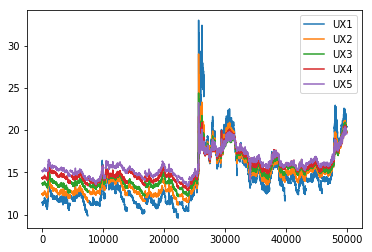

In [6]:
df.iloc[:, 2:7].plot()

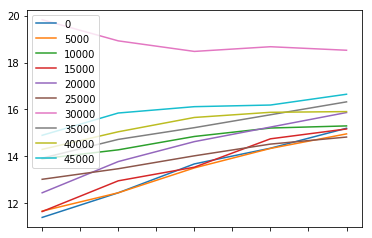

In [7]:
df.iloc[0:50000:5000, 2:7].T.plot()

In [8]:
df = add_features.drop_rows_with_null_dates(df)

drop nulls:
before: (49969, 8) 18
after: (49951, 8) 0


In [9]:
df.Date = pd.to_datetime(df.Date, dayfirst=True)

In [10]:
df = pd.concat([df, add_features.from_date_get_dow_dom_doy(df.Date)], axis=1)

In [11]:
df.head()

,Time_To_Expiration,Date,UX1,UX2,UX3,UX4,UX5,SP500,dow,dom,doy
0,8.9931,2017-05-08 23:30:00,11.40,12.45,13.68,14.35,15.20,2394.50,0,8,128
1,8.9861,2017-05-08 23:40:00,11.43,12.45,13.68,14.34,15.18,2394.75,0,8,128
2,8.9792,2017-05-08 23:50:00,11.43,12.48,13.67,14.30,15.20,2395.00,0,8,128
3,8.9722,2017-05-09 00:00:00,11.43,12.48,13.68,14.30,15.20,2395.00,1,9,129
4,8.9653,2017-05-09 00:10:00,11.43,12.45,13.68,14.30,15.20,2395.00,1,9,129


In [12]:
diff_cols = [i+"_diff" for i in df.iloc[:, 2:8].columns]
df[diff_cols] = df.iloc[:, 2:8].diff()
df = df.iloc[1:, :]

In [13]:
df["day_of_month"] = df.Date.dt.day
df["day_of_week"] = df.Date.dt.dayofweek
df["day_of_year"] = df.Date.dt.dayofyear

In [14]:
df_dow = pd.get_dummies(df.day_of_week)
df_dow_columns = ["dow_"+str(i) for i in df.day_of_week.unique().tolist()]
df_dow.columns = df_dow_columns
# df_dow
df_dom = pd.get_dummies(df.day_of_month)
df_dom_columns = ["dom_"+str(i) for i in df.day_of_month.unique().tolist()]
df_dom.columns = df_dom_columns

In [15]:
df = pd.concat([df, df_dow, df_dom], axis=1)

In [16]:
df.memory_usage().sum()//1000000

10

In [17]:
rol = df.iloc[:, 2:7].rolling(window=1000)

In [18]:
x = df.iloc[:11]

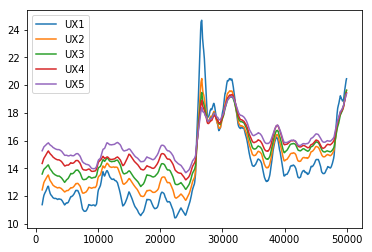

In [19]:
rol.mean().plot()

In [20]:
ux_vals = x[["UX1", "UX2", "UX3", "UX4", "UX5"]].iloc[:10].values
ux_vals

array([[11.43, 12.45, 13.68, 14.34, 15.18],
       [11.43, 12.48, 13.67, 14.3 , 15.2 ],
       [11.43, 12.48, 13.68, 14.3 , 15.2 ],
       [11.43, 12.45, 13.68, 14.3 , 15.2 ],
       [11.45, 12.48, 13.68, 14.3 , 15.2 ],
       [11.45, 12.48, 13.68, 14.3 , 15.2 ],
       [11.43, 12.45, 13.68, 14.3 , 15.2 ],
       [11.43, 12.45, 13.68, 14.3 , 15.2 ],
       [11.43, 12.47, 13.68, 14.3 , 15.2 ],
       [11.45, 12.45, 13.68, 14.3 , 15.15]])

In [21]:
dow_dummy = pd.get_dummies(x.day_of_week)#, columns=days_list)

In [22]:
df.columns

Index(['Time_To_Expiration', 'Date', 'UX1', 'UX2', 'UX3', 'UX4', 'UX5',
       'SP500', 'dow', 'dom', 'doy', 'UX1_diff', 'UX2_diff', 'UX3_diff',
       'UX4_diff', 'UX5_diff', 'SP500_diff', 'day_of_month', 'day_of_week',
       'day_of_year', 'dow_0', 'dow_1', 'dow_2', 'dow_3', 'dow_4', 'dow_6',
       'dom_8', 'dom_9', 'dom_10', 'dom_11', 'dom_12', 'dom_15', 'dom_16',
       'dom_17', 'dom_18', 'dom_19', 'dom_22', 'dom_23', 'dom_24', 'dom_25',
       'dom_26', 'dom_29', 'dom_30', 'dom_31', 'dom_1', 'dom_2', 'dom_5',
       'dom_6', 'dom_7', 'dom_13', 'dom_14', 'dom_20', 'dom_21', 'dom_27',
       'dom_28', 'dom_3', 'dom_4'],
      dtype='object')

In [23]:
def create_xy_from_df(x, verbose=False):
    time_to_expiration = np.expand_dims(x.iloc[:10].loc[:, "Time_To_Expiration"].values, 1)
    ux_vals = x.iloc[:10].loc[:, ['UX1', 'UX2', 'UX3', 'UX4','UX5']].values
    snp_vals = np.expand_dims(x.iloc[:10].loc[:, "SP500"].values, 1)
    day_of_year = np.expand_dims(x.iloc[:10].loc[:, "day_of_year"].values, 1)

    day_of_week_dummies = x.iloc[:10].loc[:, df_dow_columns].values

    day_of_month_dummies = x.iloc[:10].loc[:, df_dom_columns].values

    diffs = x.iloc[:10].loc[:, diff_cols[:-1]].values
    diff_snp = np.expand_dims(x.iloc[:10].loc[:, diff_cols[-1]].values, 1)

    if verbose:
        print("ux_vals.shape: ", ux_vals.shape)
        print("diffs.shape: ", diffs.shape)
        print("snp_vals.shape: ", snp_vals.shape)
        print("diff_snp.shape: ", diff_snp.shape)
        print("time_to_expiration.shape: ", time_to_expiration.shape)
        print("day_of_year.shape: ", day_of_year.shape)
        print("day_of_week_dummies.shape: ", day_of_week_dummies.shape)
        print("day_of_month_dummies.shape: ", day_of_month_dummies.shape)

    X = np.concatenate([ux_vals, diffs, snp_vals, diff_snp, time_to_expiration, day_of_year, day_of_week_dummies, day_of_month_dummies], axis=1)
    y = x[["UX1", "UX2", "UX3", "UX4", "UX5"]].iloc[10].values
    
    return X,y

In [24]:
i=11
X, y = create_xy_from_df(df.iloc[i-11:i, :], verbose=True)

ux_vals.shape:  (10, 5)
diffs.shape:  (10, 5)
snp_vals.shape:  (10, 1)
diff_snp.shape:  (10, 1)
time_to_expiration.shape:  (10, 1)
day_of_year.shape:  (10, 1)
day_of_week_dummies.shape:  (10, 6)
day_of_month_dummies.shape:  (10, 31)


In [25]:
x = df.iloc[i-11:i, :]
dow_list = df.Date.dt.dayofweek.unique().tolist()
print(dow_list)
x.iloc[:10]#.loc[:, dow_list].values

[0, 1, 2, 3, 4, 6]


,Time_To_Expiration,Date,UX1,UX2,UX3,UX4,UX5,SP500,dow,dom,...,dom_6,dom_7,dom_13,dom_14,dom_20,dom_21,dom_27,dom_28,dom_3,dom_4
1,8.9861,2017-05-08 23:40:00,11.43,12.45,13.68,14.34,15.18,2394.75,0,8,...,0,0,0,0,0,0,0,0,0,0
2,8.9792,2017-05-08 23:50:00,11.43,12.48,13.67,14.30,15.20,2395.00,0,8,...,0,0,0,0,0,0,0,0,0,0
3,8.9722,2017-05-09 00:00:00,11.43,12.48,13.68,14.30,15.20,2395.00,1,9,...,0,0,0,0,0,0,0,0,0,0
4,8.9653,2017-05-09 00:10:00,11.43,12.45,13.68,14.30,15.20,2395.00,1,9,...,0,0,0,0,0,0,0,0,0,0
5,8.9583,2017-05-09 00:20:00,11.45,12.48,13.68,14.30,15.20,2395.00,1,9,...,0,0,0,0,0,0,0,0,0,0
6,8.9514,2017-05-09 00:30:00,11.45,12.48,13.68,14.30,15.20,2395.00,1,9,...,0,0,0,0,0,0,0,0,0,0
7,8.9444,2017-05-09 00:40:00,11.43,12.45,13.68,14.30,15.20,2395.00,1,9,...,0,0,0,0,0,0,0,0,0,0
8,8.9375,2017-05-09 00:50:00,11.43,12.45,13.68,14.30,15.20,2395.00,1,9,...,0,0,0,0,0,0,0,0,0,0
9,8.9306,2017-05-09 01:00:00,11.43,12.47,13.68,14.30,15.20,2394.75,1,9,...,0,0,0,0,0,0,0,0,0,0
10,8.9236,2017-05-09 01:10:00,11.45,12.45,13.68,14.30,15.15,2395.00,1,9,...,0,0,0,0,0,0,0,0,0,0


In [26]:
X.shape

(10, 51)

In [27]:
df.Date.dt.dayofweek.unique().tolist()

[0, 1, 2, 3, 4, 6]

In [28]:
%%time
if os.path.exists(e_dir + "X.npy") and os.path.exists(e_dir + "y.npy"):
    X = np.load(e_dir + "X.npy")
    y = np.load(e_dir + "y.npy")
else:    
    Xs = []; ys=[]
    for i in tqdm(np.arange(11, df.shape[0]-1)):
    #     print(df.iloc[(i-11):i, :].shape)
        X, y= create_xy_from_df(df.iloc[(i-11):i, :])
        Xs.append(X)
        ys.append(y)
    X = np.stack(Xs)
    y = np.stack(ys)
    np.save(e_dir + "X.npy", X)
    np.save(e_dir + "y.npy", y)

Wall time: 99.2 ms


In [29]:
X.shape, y.shape

((49938, 10, 51), (49938, 5))

In [30]:
pd.DataFrame(X[0])

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,11.43,12.45,13.68,14.34,15.18,0.03,0.00,0.00,-0.01,-0.02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11.43,12.48,13.67,14.30,15.20,0.00,0.03,-0.01,-0.04,0.02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11.43,12.48,13.68,14.30,15.20,0.00,0.00,0.01,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11.43,12.45,13.68,14.30,15.20,0.00,-0.03,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11.45,12.48,13.68,14.30,15.20,0.02,0.03,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,11.45,12.48,13.68,14.30,15.20,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,11.43,12.45,13.68,14.30,15.20,-0.02,-0.03,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,11.43,12.45,13.68,14.30,15.20,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,11.43,12.47,13.68,14.30,15.20,0.00,0.02,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,11.45,12.45,13.68,14.30,15.15,0.02,-0.02,0.00,0.00,-0.05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
y[0]

array([11.44, 12.45, 13.68, 14.3 , 15.15])

In [32]:
import keras
import torch
import torchvision

### Define Model

In [33]:
class MiniConv2d(torch.nn.Module):
    def __init__(self):
        super(MiniConv2d, self).__init__()
        self.conv1 = torch.nn.Conv2d(1, 5, 3, padding=1)
        self.conv2 = torch.nn.Conv2d(5, 5, 3, padding=1)
        self.conv3 = torch.nn.Conv2d(5, 5, 3, padding=1)
        self.conv4 = torch.nn.Conv2d(5, 5, 3, padding=1)
        self.conv5 = torch.nn.Conv2d(5, 5, 3, padding=1)
        self.conv6 = torch.nn.Conv2d(5, 5, 3, padding=1)
        self.conv7 = torch.nn.Conv2d(5, 5, 3, padding=1)
    def forward(self, x):
        x = self.conv1(x)
        x = torch.nn.functional.relu(x)
        x = self.conv2(x)
        x = torch.nn.functional.relu(x)
        x = self.conv3(x)
        x = torch.nn.functional.relu(x)
        x = self.conv4(x)
        x = torch.nn.functional.relu(x)
        x = self.conv5(x)
        x = torch.nn.functional.relu(x)
        x = self.conv6(x)
        x = torch.nn.functional.relu(x)
        x = self.conv7(x)
        x = torch.nn.functional.relu(x)
        
        return x

In [34]:
class MiniConv1d(torch.nn.Module):
    def __init__(self):
        super(MiniConv1d, self).__init__()
        self.conv1 = torch.nn.Conv2d(1, 5, (3, 2), padding=(1, 1))
        self.conv2 = torch.nn.Conv2d(5, 5, (3, 3), padding=(1, 1))
        self.conv3 = torch.nn.Conv2d(5, 5, (3, 3), padding=(1, 1))
        self.conv4 = torch.nn.Conv2d(5, 5, (3, 3), padding=(1, 1))
        self.conv5 = torch.nn.Conv2d(5, 5, (3, 3), padding=(1, 1))
        self.conv6 = torch.nn.Conv2d(5, 5, (3, 3), padding=(1, 1))
        self.conv7 = torch.nn.Conv2d(5, 5, (3, 3), padding=(1, 1))
        
    def forward(self, x):
        x = self.conv1(x)
        x = torch.nn.functional.relu(x)
        x = self.conv2(x)
        x = torch.nn.functional.relu(x)
        x = self.conv3(x)
        x = torch.nn.functional.relu(x)
        x = self.conv4(x)
        x = torch.nn.functional.relu(x)
        x = self.conv5(x)
        x = torch.nn.functional.relu(x)
        x = self.conv6(x)
        x = torch.nn.functional.relu(x)
        x = self.conv7(x)
        x = torch.nn.functional.relu(x)
        
        return x

In [35]:
class Embeddings(torch.nn.Module):
    def __init__(self, n_categories, n_dims):
        super(Embeddings, self).__init__()
        self.embed = torch.nn.Embedding(n_categories, n_dims)
        
    def forward(self, x):
        x = self.embed(x)
        
        return x

In [36]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.mini_conv_ux = MiniConv2d()
        self.mini_conv_ux_diffs = MiniConv2d()
        self.mini_conv_snp = MiniConv1d()
        self.embed_dow = Embeddings(6, 3)
        self.embed_dom = Embeddings(31, 5)
        
        self.fc1 = torch.nn.Linear(730, 64)
        self.fc2 = torch.nn.Linear(64, 32)
        self.fc3 = torch.nn.Linear(32, 5)
        
        
    def forward(self, x):
        ux_vals = x[:, :, :5]
        ux_vals = to_expanded_tensor(ux_vals)

        ux_diffs = x[:, :, 5:10]
        ux_diffs = to_expanded_tensor(ux_diffs)

        snp_data = x[:, :, 10:12]
        snp_data = to_expanded_tensor(snp_data)
        
        singles = x[:, :, 12:14]
        singles = to_expanded_tensor(singles).squeeze()


        dow_dummies = x[:, :, 14:20]
        dow_dummies = to_expanded_tensor(dow_dummies).squeeze()

        dom_dummies = x[:, :, 20:]
        dom_dummies = to_expanded_tensor(dom_dummies).squeeze()
        
        x_ux = self.mini_conv_ux(ux_vals).view(x.shape[0], -1)
        x_diffs = self.mini_conv_ux_diffs(ux_diffs).view(x.shape[0], -1)
        x_snp = self.mini_conv_snp(snp_data).view(x.shape[0], -1)
        x_dow = self.embed_dow((dow_dummies).argmax(dim=2)).view(x.shape[0], -1)
        x_dom = self.embed_dom((dom_dummies).argmax(dim=2)).view(x.shape[0], -1)
        
        x = torch.cat((x_ux, x_diffs, x_snp, x_dom, x_dow), 1)
        
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

### split train/test

In [43]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [44]:
%%time
if os.path.exists(e_dir + "X.npy") and os.path.exists(e_dir + "y.npy"):
    X = np.load(e_dir + "X.npy")
    y = np.load(e_dir + "y.npy")
else:    
    Xs = []; ys=[]
    for i in tqdm(np.arange(11, df.shape[0]-1)):
    #     print(df.iloc[(i-11):i, :].shape)
        X, y= create_xy_from_df(df.iloc[(i-11):i, :])
        Xs.append(X)
        ys.append(y)
    X = np.stack(Xs)
    y = np.stack(ys)
    np.save(e_dir + "X.npy", X)
    np.save(e_dir + "y.npy", y)

Wall time: 98.8 ms


In [45]:
X = torch.Tensor(X)
y = torch.Tensor(y)

In [46]:
x = X[0:2]

In [47]:
def to_expanded_tensor(x):
#     x = np.expand_dims(x, 1)
#     x = torch.Tensor(x)
    x.unsqueeze_(1)
    return x

In [48]:
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset

In [49]:
BATCH_SIZE = 64
a=4
b=1
betas = torch.from_numpy(np.array([1.,2.,3.,4.,5.])).to(device)

In [50]:
n_train = int(X.shape[0]*0.8)
X_train = X[:n_train]
y_train = y[:n_train]

X_test = X[n_train:]
y_test = y[n_train:]

In [51]:
X_train, y_train = map(torch.tensor, (X_train, y_train))
train_ds = TensorDataset(X_train, y_train)
train_dl = DataLoader(train_ds, batch_size=BATCH_SIZE)

X_test, y_test = map(torch.tensor, (X_test, y_test))
test_ds = TensorDataset(X_test, y_test)
test_dl = DataLoader(test_ds, batch_size=BATCH_SIZE)

C:\ProgramData\Miniconda3\envs\pytorch1\lib\site-packages\ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.
C:\ProgramData\Miniconda3\envs\pytorch1\lib\site-packages\ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.
C:\ProgramData\Miniconda3\envs\pytorch1\lib\site-packages\ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """
C:\ProgramData\Miniconda3\envs\pytorch1\lib\site-packages

### Run Model

In [52]:
model = Model()
model = model.to(device)
# model

In [53]:
def calc_loss(alphas, betas, x_batch, y_batch):
    L1 = (alphas.abs().sum(dim=1)-200.)**2
    L2 = ((alphas*betas).sum(dim=1))**2 
    L3 = -((y_batch - x_batch[:, -1, :5])*alphas).sum()

    L = (a*L1 + b*L2 + L3).sum()
    
    return L

In [60]:
x.dtype, y.dtype, betas.dtype, alphas.dtype

(torch.float32, torch.float32, torch.float64, torch.float64)

In [54]:
optimizer = torch.optim.Adam(model.parameters())

In [55]:

for epoch in range(1):
    idx = np.arange(n_train)
    np.random.shuffle(idx)
    X_train = X_train[idx]
    y_train = y_train[idx]
    for i, (x, y) in enumerate(train_dl):
        x, y = x.to(device), y.to(device)
#         print(x)
        alphas = model(x).type(torch.DoubleTensor)
        print(type(alphas))
        
        loss = calc_loss(alphas, betas, x, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if i%10==0:
            print(loss)
#             model.eval()
#             model


<class 'torch.Tensor'>


RuntimeError: expected type torch.DoubleTensor but got torch.cuda.DoubleTensor